In [1]:
#In this assignment students have to compress racoon grey scale image into 5 clusters. In the end, visualize both raw and compressed image and look for quality difference. 
#The raw image is available in spicy.misc package with the name face. 
 
#Hint:  
#import numpy as np 
#from sklearn import cluster, datasets 
#from scipy import misc

In [2]:
#Load Libraries
import numpy as np
import pandas as pd
from sklearn import cluster, datasets 
from sklearn.cluster import KMeans
from scipy import misc as scipy
import scipy.misc
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import *

In [5]:
#Get Images data from Misc face
image=scipy.misc.face()
image.shape

(768, 1024, 3)

In [6]:
#Dimensions of the image
print(image.shape[0])
print(image.shape[1])
print(image.shape[2])

768
1024
3


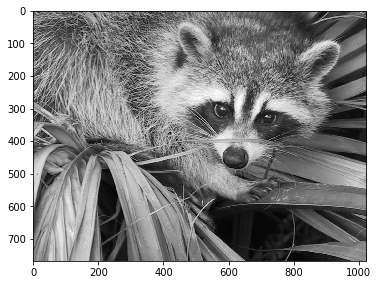

In [8]:
#raw image
# Visualize the gray scale image
image = scipy.misc.face(gray=True)

plt.figure(figsize=(20, 4.6))
plt.imshow(image,cmap=plt.cm.gray)
plt.show()

In [10]:
# Compress Image Data
#Rows and Columns
rows = image.shape[0]
cols = image.shape[1]
compress_image = image.reshape(rows*cols,1)
print(rows)
print(cols)

768
1024


In [11]:
print(compress_image)

[[114]
 [130]
 [145]
 ...
 [142]
 [141]
 [140]]


In [13]:
# Compressing the gray scale image into 5 clusters
rows = image.shape[0]
cols = image.shape[1]

image_kmeans = image.reshape(rows*cols,1)
kmeans = KMeans(n_clusters = 5)
kmeans.fit(image_kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [14]:
# Cluster Lables and CLuster Center
print('Keamns Cluser',kmeans.labels_)
print(' ')
print('Keamns Cluster Center',kmeans.cluster_centers_)

Keamns Cluser [2 2 0 ... 0 0 0]
 
Keamns Cluster Center [[152.22421148]
 [ 27.11166441]
 [113.07485109]
 [ 73.91549783]
 [194.13840989]]


In [15]:
kmeans.predict(image_kmeans)

array([2, 2, 0, ..., 0, 0, 0])

clusters Center  [[152.22421148]
 [ 27.11166441]
 [113.07485109]
 [ 73.91549783]
 [194.13840989]]
 
labels  [2 2 0 ... 0 0 0]
 
labels after reshape  [[2 2 0 ... 2 2 0]
 [3 2 2 ... 2 0 0]
 [3 3 2 ... 2 0 0]
 ...
 [2 2 2 ... 0 0 0]
 [2 2 2 ... 0 0 0]
 [2 2 2 ... 0 0 0]]
 
Visualize the compressed image using cluster labels


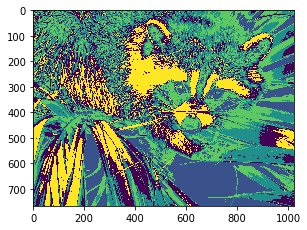

In [18]:
#Compressed Image
#Create Image using Cluster Lables and rows and Columns
clusters = np.asarray(kmeans.cluster_centers_)
print('clusters Center ',clusters)
print(' ')
labels = np.asarray(kmeans.labels_)  
print('labels ',labels)
print(' ')
labels = labels.reshape(rows,cols)
print('labels after reshape ',labels)
print(' ')

#np.save('codebook_racoon.npy',clusters)
plt.imsave('racoon_compressed_image.png',labels)

# Visualize the compressed image
print('Visualize the compressed image using cluster labels')

image = plt.imread('racoon_compressed_image.png')
plt.figure(figsize=(10, 3.6))
plt.imshow(image)
plt.show()